# Part I - (UsedCarsSA)
## by (Abdulmajeed Duraibi)

## Introduction
To complete this project, I downloaded [Saudi Arabia Used Cars](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset?datasetId=1430609) dataset, and I selected it based on Udacity standards. The dataset related to used cars collected from [Syarah](https://syarah.com/) that enables users to sell their cars. Though the target of this project is visualization, so I work with the cleaned version of data.
<br>

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

color = sb.color_palette()[0]


In [2]:
# leod the dataset
df = pd.read_csv('UsedCarsSA.csv')
df.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [4]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,8035.000000,8035.000000,8.035000e+03,8.035000e+03
mean,2014.097698,3.287729,1.491488e+05,5.369984e+04
std,5.757228,1.517747,3.474480e+05,7.198472e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,2016.000000,3.000000,1.019600e+05,3.700000e+04
75%,2018.000000,4.400000,1.950000e+05,7.375000e+04
max,2022.000000,9.000000,2.000000e+07,1.150000e+06


### What is the structure of your dataset?

As I mentioned in **Introduction** part, I'll work with cleaned data version. <br> The dataset contains 8035 observations and 13 columns

- Make: Company that makes the car, such: Hyundai, Toyota, Mercedes
- Type: Name of the car, such: Elantra, Camry, CLA
- Year: Model of car, such: 2020, 2021, 2022
- Origin: Options of the car: such saudi options, Gulf arabic 
- Color: Color of the car, such: Black, White, Blue
- Options: if Options = full, that means the car have full options
- Engine_Size: such 5.7
- Fuel_Type: such: Gas, Diesel
- Gear_Type: such: Manuel, Automatic
- Mileage: such 103000 in KM
- Region: such Riyadh, Jeddah
- Price: such 114000 SAR
- Negotiable: is price negotiable or not
- Which fuel type is most popular across all regions?

### What is/are the main feature(s) of interest in your dataset?

> Generally, I'm intersting in car wolrd and that motivate to select this dataset. This dataset will help me to dicover many things, such:
- Which Company most people purchased from?
- Which Top 10 cars?
- Which car's range year sells the most
- Saudi or Gulf Arabic is the most common origin?
- Which Color has the most sales?
- For most cars, what is the engine size?
- What type of fuel is most commonly used in cars?
- What is most popular gear type for selling cars?
- Which Region has most sales?
- What price range?
- Is most car's price negotiable?
- Does the price increase by car's year?
- Does engine size affect fuel type?
- In all origins, are automatic cars more popular than manual cars?
- Is there relation between Price and Year and Gear Type?
- Is there relation between Price and Year and Region?
 <br>
 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All features

---
---

## Univariate Exploration

Which `Company` most people purchased from?

In [5]:
if False:
    print ('hi')

In [6]:
def vertical_bar_chart(data, x, title, rotation, figsize):
    
    """plotting vertical bar char"""
    
    order = data[x].value_counts().index
    fig = plt.figure()
    ax = fig.add_axes(figsize)
    
    if rotation:
        sb.countplot(data = df, x = x, color = color, order = order, ax = ax)
        plt.xticks(rotation = 90);
    else:
        sb.countplot(data = df, x = x, color = color, order = order, ax = ax)
    plt.title(title);

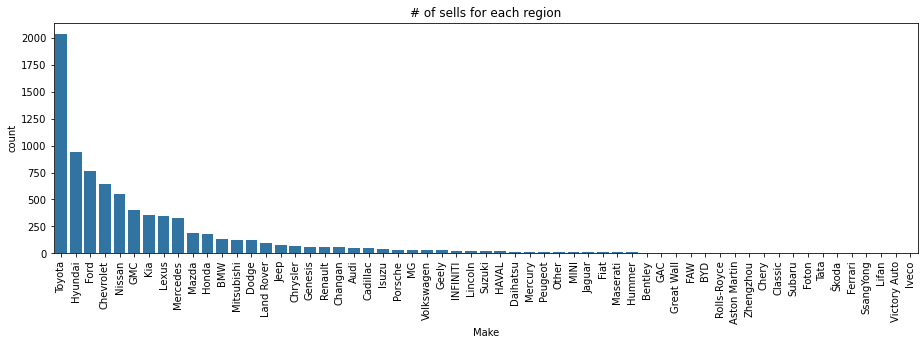

In [7]:
vertical_bar_chart(data = df, x = 'Make', title = '# of sells for each region', rotation=True, figsize = [.125, .125, 2, 0.8])

> We notice `Toyota` is most company most people purchase they cars by about 2000 cars.

---

Which Top 10 cars?

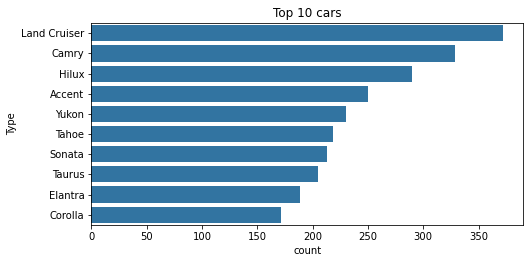

In [8]:
type_order = df['Type'].value_counts().nlargest(10).index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1, 0.7])
sb.countplot(data = df, y = 'Type', color = color, order = type_order, ax = ax)
plt.title('Top 10 cars');

Based on bar char, The top 10 cars are:
<ol>
  <li>Land Cruiser</li>
  <li>Camry</li>
  <li>Hilux</li>
  <li>Accent</li>
  <li>Yukon</li>
  <li>Tahoe</li>
  <li>Sonata</li>
  <li>Taurus</li>
  <li>Elantra</li>
  <li>Corolla</li>
</ol>

---

Which car's range year sells the most

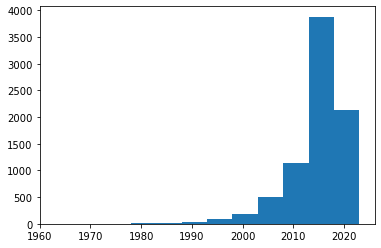

In [9]:
# Create bins with step-size 5
bins = np.arange(df['Year'].min(), df['Year'].max()+5, 5)
plt.hist(data = df, x = 'Year', bins = bins);

> The histogram is fairly left skewed, so I'll change lower and upper bound to 1990 to 2022

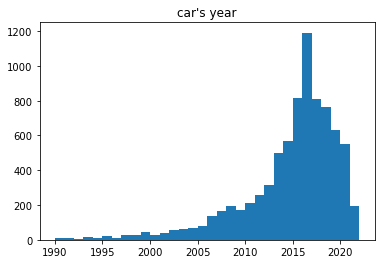

In [10]:
# Create bins with step-size 5
bins = np.arange(1990, 2023, 1)
plt.hist(data = df, x = 'Year', bins = bins)
plt.title("car's year");

> We notice the histogram is left skewed. and most of car's year between 2013 and 2020 

---

Saudi or Gulf Arabic is the most common `origin`?

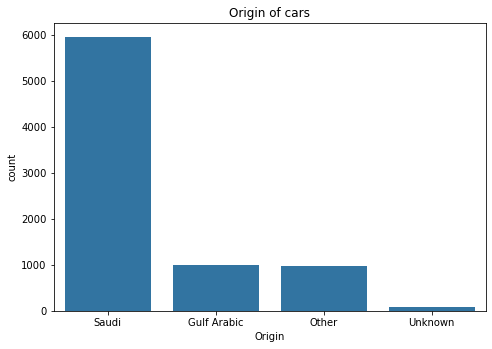

In [11]:
vertical_bar_chart(data = df, x = 'Origin', title = 'Origin of cars', rotation=False, figsize = [1,0,1,1])

> Saudi

---

Which `Color` has the most sales?

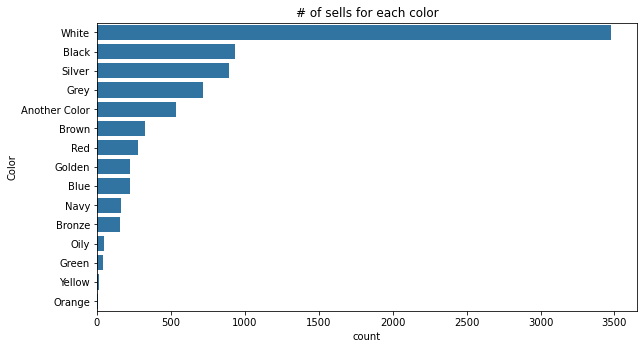

In [12]:
color_order = df['Color'].value_counts().index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.25, 1])
sb.countplot(data = df, y = 'Color', color = color, order = color_order, ax = ax)
# plt.xticks(rotation = 90);
plt.title('# of sells for each color');

> We can easly see the `White` color has most sells by about 3500 cars,`Orange` and `Yellow` are least colors sell cars

---

Which `Options` most people purchased

In [13]:
standard = df[df['Options'] == 'Standard'].count()
standard[1]

2610

In [14]:
semi_full = df[df['Options'] == 'Semi Full'].count()
semi_full[1]

2232

In [15]:
full = df[df['Options'] == 'Full'].count()
full[1]

3193

In [16]:
df['Options'].value_counts()

Full         3193
Standard     2610
Semi Full    2232
Name: Options, dtype: int64

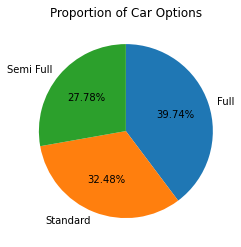

In [17]:
options = [full[1], standard[1], semi_full[1]]
sorted_counts = df['Options'].value_counts()
plt.pie(options, labels = sorted_counts.index , autopct="%1.2f%%", startangle = 90, counterclock = False)
plt.title('Proportion of Car Options')
plt.show()

> Based on pie chart, most people purchase `Full` option by 40%, then `Standard` options by 32% and least pepole purchase `Semi Full` by 28%

---

For most cars, what is the engine size?

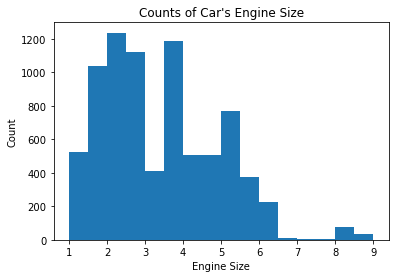

In [18]:
# Create bins with step-size 5
bins = np.arange(df['Engine_Size'].min(), df['Engine_Size'].max()+0.1, 0.5)
plt.hist(data = df, x = 'Engine_Size', bins = bins)
plt.xlabel('Engine Size')
plt.ylabel('Count')
plt.title("Counts of Car's Engine Size");

> Most cars have size engine between 1.5 - 3.0

---

What type of fuel is most commonly used in cars?

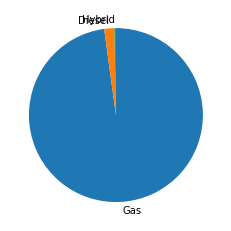

In [19]:
sorted_counts = df['Fuel_Type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,startangle = 90,
        counterclock = False);

> Bie chart isn't good to visual `Fuel_Type` feature, lets try bar chart

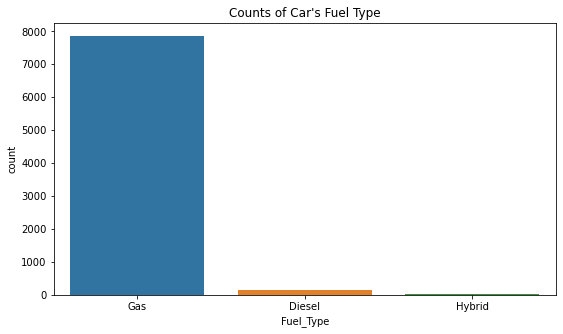

In [20]:
plt.figure(figsize = [9,5])
sb.countplot(data = df , x = 'Fuel_Type')
plt.title("Counts of Car's Fuel Type")
plt.show();

> Gas

---

Most popular gear type for selling cars

In [21]:
Manual = df[df['Gear_Type'] == 'Manual'].count()
Manual[1]

1064

In [22]:
Automatic = df[df['Gear_Type'] == 'Automatic'].count()
Automatic[1]

6971

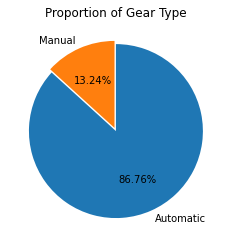

In [23]:
Gear_Type = [Automatic[1], Manual[1]]
sorted_counts = df['Gear_Type'].value_counts()
plt.pie(Gear_Type, labels = sorted_counts.index , autopct="%1.2f%%", explode = [0,0.04], startangle = 90, counterclock = False)
plt.title('Proportion of Gear Type')
plt.show()

> There is gap between cars that used `Manual` and cars that used `Automatic` about 87% of cars used `Automatic` gear, and about 13% of cars used `Manual` gear

---

*which `Region` has most sales?*

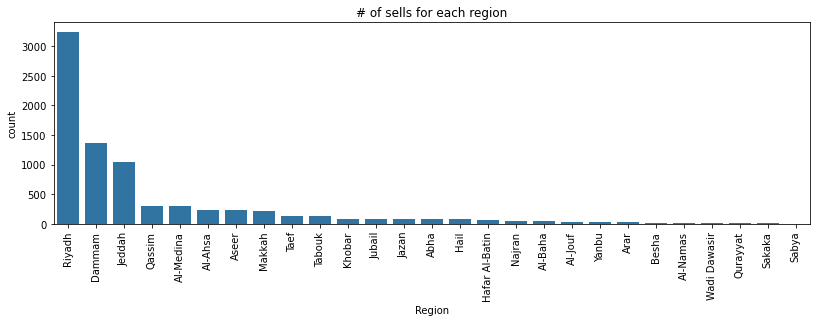

In [24]:
reg_order = df['Region'].value_counts().index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.75, 0.7])
sb.countplot(data = df, x = 'Region', color = color, order = reg_order, ax = ax)
plt.xticks(rotation = 90);
plt.title('# of sells for each region');

> We can easly see the `Riyadh` regoin has most sells by about 3500 cars, and `Sabya` is least regoin sell cars

---

What price range?

(array([6.994e+03, 7.960e+02, 1.660e+02, 5.500e+01, 1.100e+01, 4.000e+00,
        6.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([      0.,  115000.,  230000.,  345000.,  460000.,  575000.,
         690000.,  805000.,  920000., 1035000., 1150000.]),
 <BarContainer object of 10 artists>)

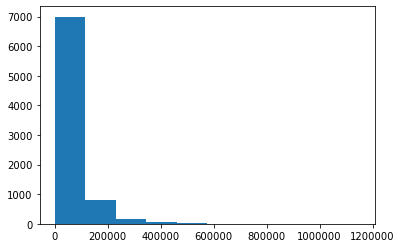

In [25]:
plt.ticklabel_format(style='plain')
plt.hist(data = df, x = 'Price')

> We notice the most car price less the 400K, so, let's take closer look on `price`
> Also, I'll remove the car's price = 0, because most of them is negotiable

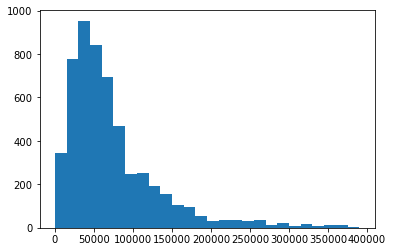

In [26]:
# Create bins with step-size 5
bins = np.arange(1, 400000, 15000)
plt.hist(data = df, x = 'Price', bins = bins);

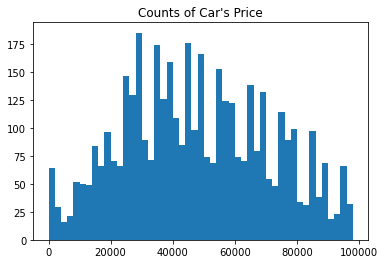

In [27]:
# Create bins with step-size 5
bins = np.arange(1, 100000, 2000)
plt.hist(data = df, x = 'Price', bins = bins)
plt.title("Counts of Car's Price");

> most car's price between 30,000 and 80,000

---

is most car's price negotiable?

Text(0.5, 1.0, "Negotiability of Car's Price")

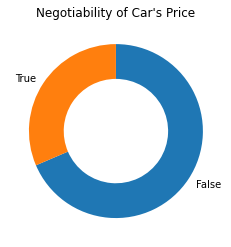

In [28]:
sorted_counts = df['Negotiable'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title("Negotiability of Car's Price")

> Based on chart, the car price usually not negotiable.

---

---

## Bivariate Exploration

### Quantitative variable vs Quantitative variable

Does the price increase by car's year?

Text(0.5, 1.0, "Average Car's price by Car's Year")

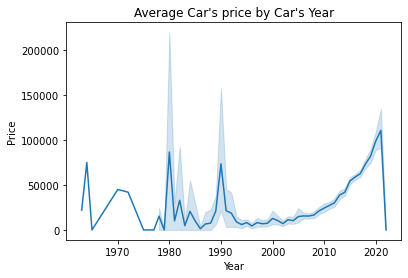

In [29]:
sb.lineplot(data=df, x="Year", y="Price");
plt.title("Average Car's price by Car's Year")

> We notice in `1980` the average price is high, Also in `1990` and `2020`

---

### Quantitative variable vs Qualitative variable

Does engine size affect fuel type?

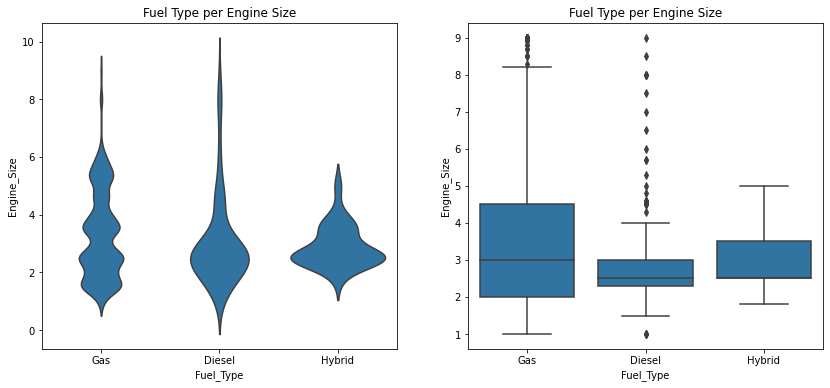

In [30]:
plt.figure(figsize = [14,6])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df, x='Fuel_Type', y='Engine_Size', inner = None, color=color)
plt.title("Fuel Type per Engine Size")

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='Fuel_Type', y='Engine_Size', color=color)

plt.title("Fuel Type per Engine Size")
plt.show;

> Cars that used `Gas` as a fuel, usually has large engine <br>
> Cars that used `Hybrid` as a fuel, usually has `2.5`engine size


---

### Qualitative variable vs Qualitative variable

In all origins, are automatic cars more popular than manual cars?

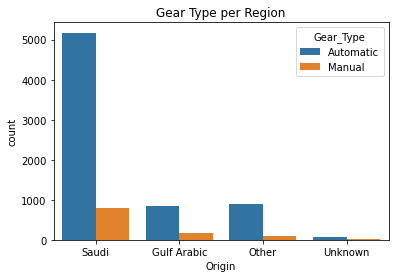

In [31]:
sb.countplot(data = df, x= 'Origin', hue = 'Gear_Type')
plt.title("Gear Type per Region");

> We notice from all origins, most cars are `Automatic`

---

Which fuel type is most popular across all regions?

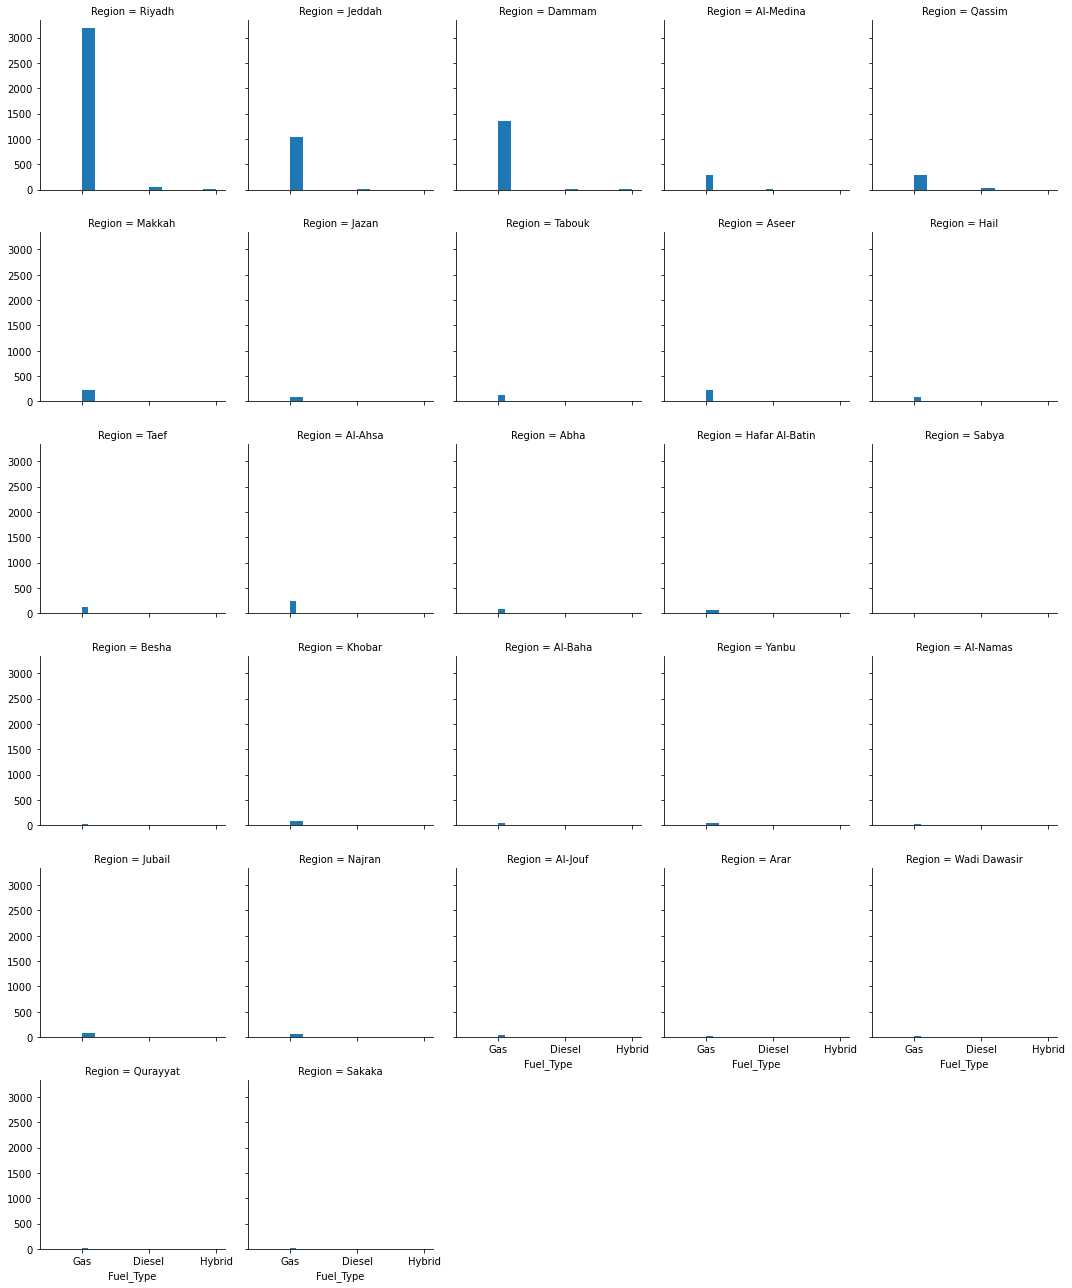

In [32]:
g = sb.FacetGrid(data = df, col = 'Region', col_wrap=5)
g.map(plt.hist, 'Fuel_Type');

> Gas is the most popular fuel type in all regions

---

---

## Multivariate Exploration


### Two numeric variables and one categorical variable

Is there relation between Price and Year and Gear Type?

Text(0.5, 1.0, "Average Car's price by Car's Year Group by Gear Type")

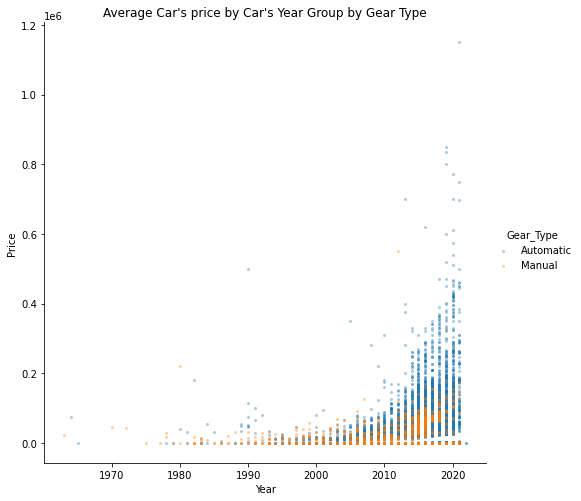

In [33]:
g = sb.FacetGrid(data = df, hue = 'Gear_Type', height = 7)
g.map(plt.scatter, 'Year', 'Price', alpha = 0.3, s=4)
g.add_legend();
plt.title("Average Car's price by Car's Year Group by Gear Type")

> We can clearly notice the `Automatic` cars is `higher-priced` than `Manual` when car's year increase

---

Is there relation between Price and Year and Region?

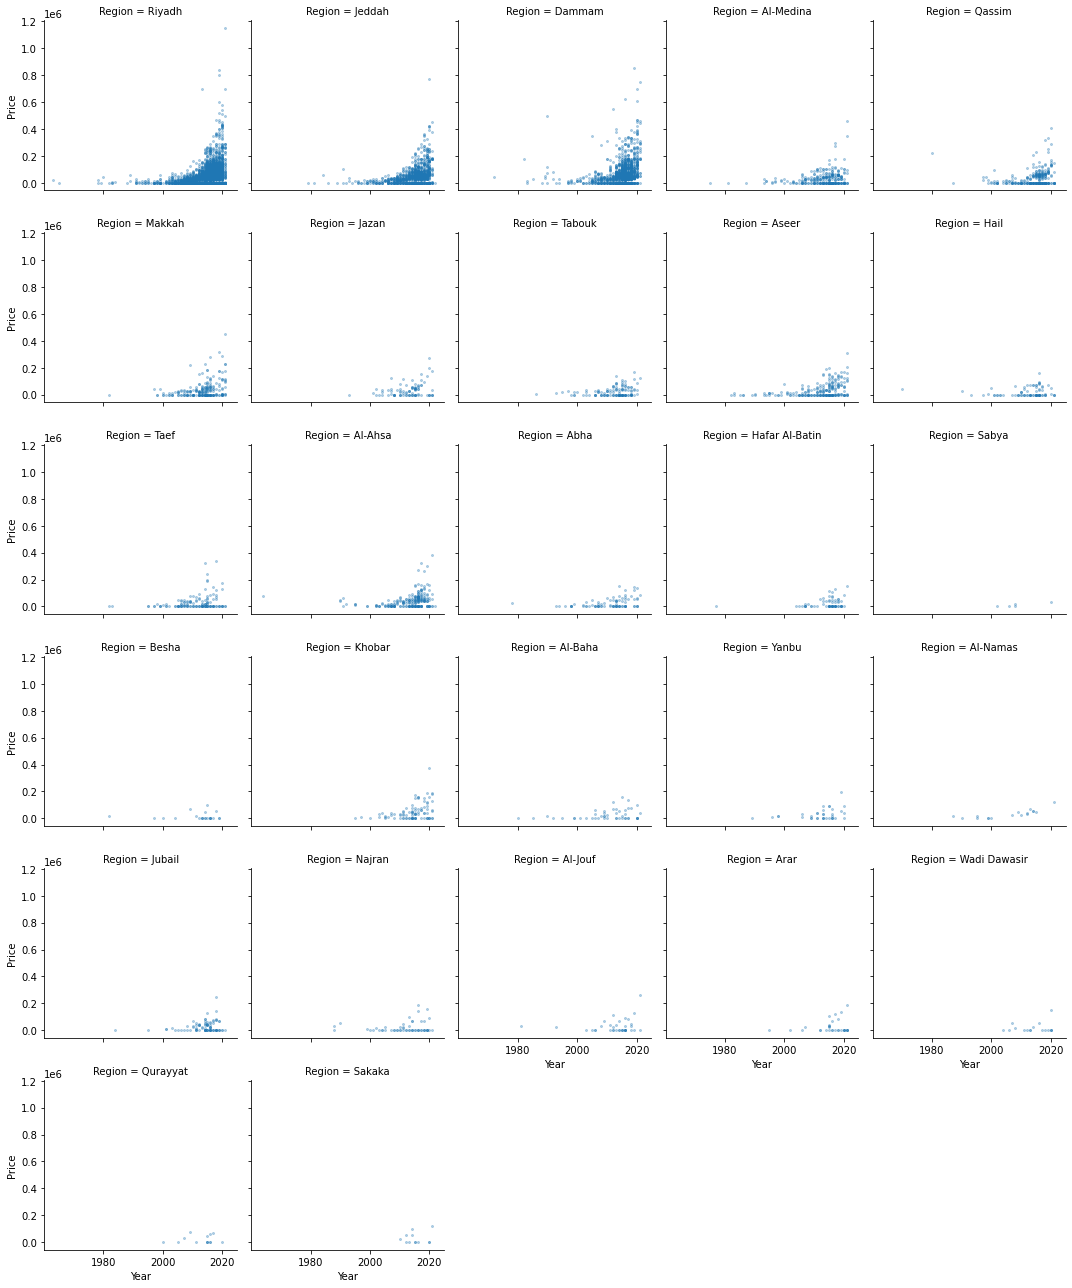

In [34]:
g = sb.FacetGrid(data = df, col = 'Region', col_wrap=5)
g.map(plt.scatter, 'Year', 'Price', alpha = 0.3, s=4);

There is an increase in price in all regions as the car's year increases

---

---

## Conclusions
I really enjoyed in this project and I tried to go all appropriate visuals for this data set. I found about 16 observations, these observations between univariate, bivariate and multivariate Explorations. <br>
I used the `Question-Visualization-Observations` framework. This framework involves asking a question from the data, creating a visualization to find answers, and then recording observations.